## Exercise 3.01: Loading and checking out the data

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
bank0 = pd.read_csv('Azra_Bank_Marketing_v1.zip', compression='zip')

In [3]:
bank0.head()

,age,job,marital,education,balance,housing,loan,contact,month,duration,poutcome,deposit
0,59.0,admin.,married,secondary,2343,yes,no,unknown,may,1042,unknown,yes
1,56.0,admin.,married,secondary,45,no,no,unknown,may,1467,unknown,yes
2,41.0,technician,married,secondary,1270,yes,no,unknown,may,1389,unknown,yes
3,55.0,services,married,secondary,2476,yes,no,unknown,may,579,unknown,yes
4,54.0,admin.,married,tertiary,184,no,no,unknown,may,673,unknown,yes


In [4]:
bank0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   balance    11162 non-null  int64  
 5   housing    11162 non-null  object 
 6   loan       11162 non-null  object 
 7   contact    11162 non-null  object 
 8   month      11162 non-null  object 
 9   duration   11162 non-null  int64  
 10  poutcome   11139 non-null  object 
 11  deposit    11153 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.0+ MB


In [5]:
bank0.deposit.value_counts()

no     5869
yes    5284
Name: deposit, dtype: int64

In [6]:
bank0.deposit.value_counts(normalize=True)

no     0.526226
yes    0.473774
Name: deposit, dtype: float64

## Exercise 3.02: Fixing formats & identifying missing values

Making a copy of the dataset to make modifications, so that the original is not lost.

In [7]:
bank1 = bank0.copy()

Modifying the target variable to have 0/1 values

In [8]:
bank1.deposit = bank1.deposit.map({'yes':1, 'no':0})

In [9]:
bank1.deposit.value_counts(normalize=True)

0.0    0.526226
1.0    0.473774
Name: deposit, dtype: float64

Missing values that are obvious

In [10]:
nulls = bank1.isnull().sum()
nulls[nulls>0]

age         10
poutcome    23
deposit      9
dtype: int64

Missing values that are not obvious

In [11]:
bank1.poutcome.value_counts()

unknown    8309
failure    1226
success    1069
other       535
Name: poutcome, dtype: int64

In [12]:
bank1.contact.value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

**Note**: We will see later how to deal with the missing values. For now it is enough to identify them and be mindful of them during the preprocessing.

In [13]:
bank1.education.value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

**Special case: Missing value in the outcome**

In [14]:
bank1.shape

(11162, 12)

In [15]:
bank1 = bank1.dropna(subset=['deposit'])

In [16]:
bank1.shape

(11153, 12)

Dropping the duration column

In [17]:
bank1.drop('duration',axis=1, inplace=True)

## Exercise 3.3: Splitting the data into train and test sets

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_train, df_test = train_test_split(bank1, \
                                     test_size=0.2, \
                                     random_state=42, \
                                     stratify=bank1.deposit)

In [20]:
df_train.shape, df_test.shape

((8922, 11), (2231, 11))

In [21]:
df_train.apply([np.mean, np.median, np.std])

,age,balance,deposit
mean,41.191160,1504.879848,0.473773
median,39.000000,542.500000,0.000000
std,11.891117,3119.918931,0.499340


In [22]:
df_test.apply([np.mean, np.median, np.std])

,age,balance,deposit
mean,41.401974,1620.630659,0.473779
median,39.000000,580.000000,0.000000
std,12.001119,3614.739282,0.499424


Note: Stratify wasn't very needed here, but is a good practice in general. This ensures that both test and train set have the same distribution of the outcome labels. This can be very useful in situation with low number of records and especially useful when dealing with imbalanced classes (i.e. very uneven distributiom of the labels)

## Exercise 3.4: Outlier treament
**Note**: Defining outliers, rules to identify them, handling strategy must be completely based on the training data alone. Once decided, only the application of the logic and handling can be applied to the test set.  
Box plot of `age` to visually assess outliers 

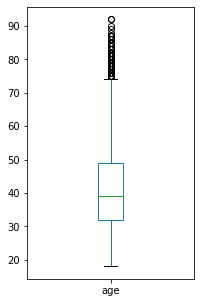

In [23]:
df_train.age.plot.box(figsize=[3,5])
plt.show()

In [24]:
Q3 = df_train.age.quantile(0.75)
Q1 = df_train.age.quantile(0.25)
IQR = Q3 - Q1
print("Lower cutoff:", Q1 - 1.5*IQR, 
      "; Upper cutoff:", Q3 + 1.5*IQR)

Lower cutoff: 6.5 ; Upper cutoff: 74.5


Box plot of `balance` to visually assess outliers 

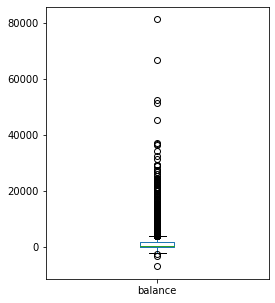

In [25]:
df_train.balance.plot.box(figsize=[4,5])
plt.show()

Negative values are NOT issues as people can indeed have negative balances. 

In [26]:
Q3 = df_train.balance.quantile(0.75)
Q1 = df_train.balance.quantile(0.25)
IQR = Q3 - Q1
print("Lower cutoff:",Q1 - 1.5*IQR, \
      "; Upper cutoff:", Q3 + 1.5*IQR)

Lower cutoff: -2245.5 ; Upper cutoff: 4062.5


In [27]:
df_train.balance.quantile([0.95, 0.99, 0.995])

0.950     5915.900
0.990    13341.160
0.995    20061.165
Name: balance, dtype: float64

In [28]:
cutoff_balance = 20000
df_train = df_train[df_train.balance <= cutoff_balance].copy()

In [29]:
df_train.shape

(8876, 11)

In [30]:
df_test = df_test[df_test.balance <= cutoff_balance].copy()
df_test.shape

(2220, 11)

## Exercise 3.5: Missing value treament

In [31]:
nulls = df_train.isnull().sum()
nulls[nulls>0]

age          8
poutcome    17
dtype: int64

**Get the median and the average age**

In [32]:
df_train.age.mean(), df_train.age.median()

(41.148849797023004, 39.0)

**Imput using the median age**

In [33]:
age_median = df_train.age.median()

In [34]:
df_train.loc[df_train.age.isnull(),'age'] = age_median

**Impute age in the test dataset as well**

In [35]:
df_test.loc[df_test.age.isnull(),'age'] = age_median

In [36]:
nulls = df_train.isnull().sum()
nulls[nulls>0]

poutcome    17
dtype: int64

**Distribution of poutcome**

In [37]:
df_train.poutcome.value_counts(dropna=False)

unknown    6607
failure     963
success     858
other       431
NaN          17
Name: poutcome, dtype: int64

**Replace with 'unknown'**

In [38]:
df_train.loc[df_train.poutcome.isnull(),'poutcome'] = 'unknown'

In [39]:
df_train.poutcome.value_counts(dropna=False)

unknown    6624
failure     963
success     858
other       431
Name: poutcome, dtype: int64

**Impute for test data as well**

In [40]:
df_test.loc[df_test.poutcome.isnull(),'poutcome'] = 'unknown'

## Section: Solving our case study

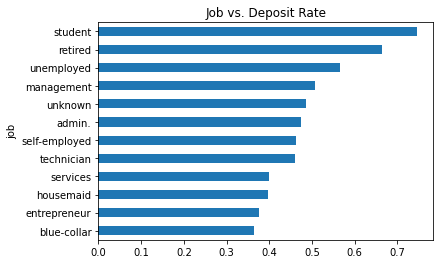

In [41]:
bank1.groupby('job')['deposit'].mean().sort_values().plot.barh()
plt.title("Job vs. Deposit Rate")
plt.show()

Strategy for our case study -
 - Reduce levels (club similar ones) in a feature
 - Combine features containing similar/complementary information (feature engineering, later)
 - Encoding (dummy, effect etc.)

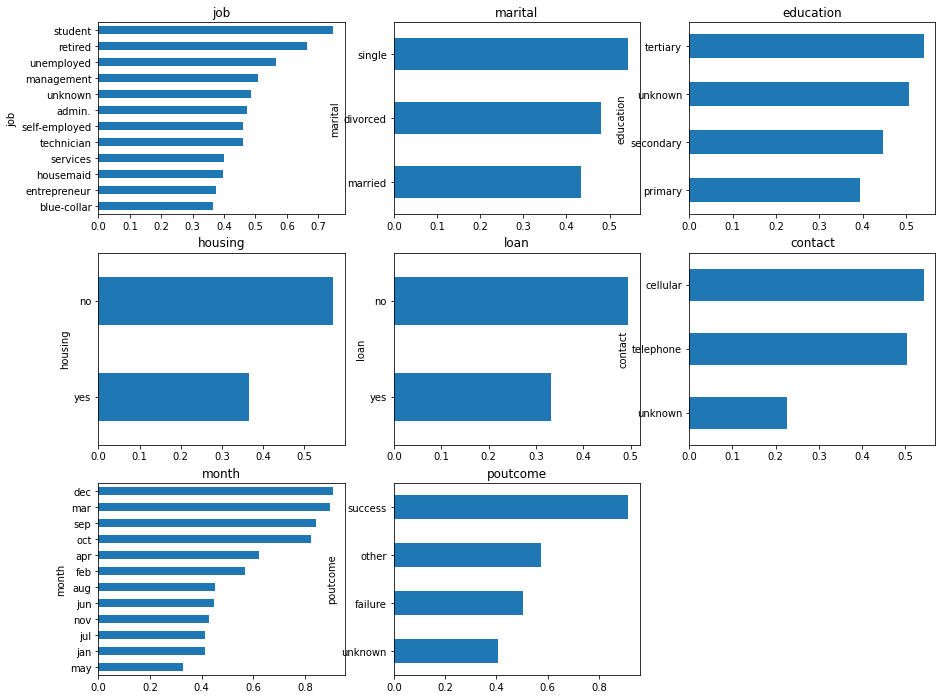

In [42]:
cat_cols = df_train.select_dtypes("object").columns
plt.figure(figsize=[15,12])
for ind, col in enumerate(cat_cols):
    plt.subplot(3,3,ind+1)
    bank1.groupby(col)['deposit'].mean().sort_values().plot.barh()
    plt.title(col)
plt.show()

**Target encoding for job**

In [43]:
!pip install category_encoders


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
from category_encoders.target_encoder import TargetEncoder
enc_target = TargetEncoder()

C:\Users\mirza\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\mirza\AppData\Local\Continuum\anaconda3\lib\site-packages\category_encoders\target_encoder.py:124: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
C:\Users\mirza\AppData\Local\Continuum\anaconda3\lib\site-packages\category_encoders\target_encoder.py:129: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [45]:
df_train['job_encoded'] = enc_target.fit_transform(df_train.job, df_train.deposit)

In [46]:
df_train.groupby(['job','job_encoded']).size()

job            job_encoded
admin.         0.467317       1025
blue-collar    0.359274       1542
entrepreneur   0.380435        276
housemaid      0.384956        226
management     0.511133       2066
retired        0.659539        608
self-employed  0.463190        326
services       0.404601        739
student        0.749104        279
technician     0.464187       1452
unemployed     0.577061        279
unknown        0.482759         58
dtype: int64

In [47]:
df_test['job_encoded'] = enc_target.transform(df_test.job)

In [48]:
from category_encoders.one_hot import OneHotEncoder
enc_onehot =  OneHotEncoder(return_df=True, use_cat_names=True)

In [49]:
dumms = enc_onehot.fit_transform(df_train.marital)
dumms.head()

,marital_single,marital_married,marital_divorced
3785,1,0,0
1748,0,1,0
5314,0,1,0
10907,1,0,0
6796,0,0,1


In [50]:
df_train = df_train.join(dumms.drop('marital_divorced',axis = 1))
df_train.drop('marital',axis=1,inplace=True)
df_train.head()

,age,job,education,balance,housing,loan,contact,month,poutcome,deposit,job_encoded,marital_single,marital_married
3785,40.0,services,secondary,1038,no,no,unknown,jun,unknown,0.0,0.404601,1,0
1748,55.0,technician,tertiary,-466,yes,no,cellular,may,unknown,1.0,0.464187,0,1
5314,37.0,blue-collar,secondary,454,yes,no,unknown,may,unknown,0.0,0.359274,0,1
10907,30.0,blue-collar,secondary,228,no,no,cellular,feb,failure,0.0,0.359274,1,0
6796,57.0,retired,secondary,316,no,no,cellular,jan,unknown,0.0,0.659539,0,0


In [51]:
dumms_test = enc_onehot.transform(df_test.marital)
df_test = df_test.join(dumms_test.drop('marital_divorced',axis = 1))
df_test.drop('marital',axis=1,inplace=True)

## Exercise 3.6: Handling categorical values

1. Create an indicator variable for the field `poutcome`. The value should be 1 for 'success' and 0 otherwise.

In [52]:
df_train['poutcome'] = np.where(df_train.poutcome == "success", 1, 0)
df_test['poutcome'] = np.where(df_test.poutcome == "success", 1, 0)

2. Create an indicator variable to replace the original `contact` feature that indicates if the value was ‘unknown’. Do so for the test dataset as well.

In [53]:
df_train['contact'] = np.where(df_train.contact == "unknown", 1, 0)
df_test['contact'] = np.where(df_test.contact == "unknown", 1, 0)

3. Perform target encoding for the `month` feature

In [54]:
enc_target = TargetEncoder()

C:\Users\mirza\AppData\Local\Continuum\anaconda3\lib\site-packages\category_encoders\target_encoder.py:124: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
C:\Users\mirza\AppData\Local\Continuum\anaconda3\lib\site-packages\category_encoders\target_encoder.py:129: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [55]:
df_train['month_enc'] = enc_target.fit_transform(df_train.month, df_train.deposit)
df_test['month_enc'] = enc_target.transform(df_test.month)

4. Create an indicator feature for ‘education’ that is 1 when the value was either ‘primary’ or ‘secondary’. These are the low success rate categories. Do the same for the test data as well.

In [56]:
ind_vals = ['primary', 'secondary']
df_train['edu_enc'] = np.where(df_train.education.isin(ind_vals), 1, 0)
df_test['edu_enc'] = np.where(df_test.education.isin(ind_vals), 1, 0)

In [57]:
df_train.groupby(['education', 'edu_enc']).size()

education  edu_enc
primary    1          1187
secondary  1          4324
tertiary   0          2963
unknown    0           402
dtype: int64

In [58]:
df_train.head()

,age,job,education,balance,housing,loan,contact,month,poutcome,deposit,job_encoded,marital_single,marital_married,month_enc,edu_enc
3785,40.0,services,secondary,1038,no,no,1,jun,0,0.0,0.404601,1,0,0.457819,1
1748,55.0,technician,tertiary,-466,yes,no,0,may,0,1.0,0.464187,0,1,0.332447,0
5314,37.0,blue-collar,secondary,454,yes,no,1,may,0,0.0,0.359274,0,1,0.332447,1
10907,30.0,blue-collar,secondary,228,no,no,0,feb,0,0.0,0.359274,1,0,0.568106,1
6796,57.0,retired,secondary,316,no,no,0,jan,0,0.0,0.659539,0,0,0.403571,1


In [59]:
df_train.drop(['job','education','month'],
              axis=1, inplace=True)
df_test.drop(['job','education','month'],
              axis=1, inplace=True)

In [60]:
df_train.head()

,age,balance,housing,loan,contact,poutcome,deposit,job_encoded,marital_single,marital_married,month_enc,edu_enc
3785,40.0,1038,no,no,1,0,0.0,0.404601,1,0,0.457819,1
1748,55.0,-466,yes,no,0,0,1.0,0.464187,0,1,0.332447,0
5314,37.0,454,yes,no,1,0,0.0,0.359274,0,1,0.332447,1
10907,30.0,228,no,no,0,0,0.0,0.359274,1,0,0.568106,1
6796,57.0,316,no,no,0,0,0.0,0.659539,0,0,0.403571,1


## Exercise 3.7: Optional - creating new features

In [61]:
df_train.groupby(['housing','loan'])['deposit'].mean()

housing  loan
no       no      0.595033
         yes     0.341897
yes      no      0.379019
         yes     0.306604
Name: deposit, dtype: float64

In [62]:
df_train['loan_any'] = df_train.housing + df_train.loan
df_train.loan_any = np.where(df_train.loan_any=='nono',1,0)

In [63]:
df_train[['housing','loan','loan_any']].head()

,housing,loan,loan_any
3785,no,no,1
1748,yes,no,0
5314,yes,no,0
10907,no,no,1
6796,no,no,1


In [64]:
df_test['loan_any'] = df_test.housing + df_test.loan
df_test.loan_any = np.where(df_test.loan_any=='nono',1,0)

In [65]:
df_train.drop(['housing','loan'],axis=1,inplace=True)
df_test.drop(['housing','loan'],axis=1,inplace=True)

In [66]:
df_train.head()

,age,balance,contact,poutcome,deposit,job_encoded,marital_single,marital_married,month_enc,edu_enc,loan_any
3785,40.0,1038,1,0,0.0,0.404601,1,0,0.457819,1,1
1748,55.0,-466,0,0,1.0,0.464187,0,1,0.332447,0,0
5314,37.0,454,1,0,0.0,0.359274,0,1,0.332447,1,0
10907,30.0,228,0,0,0.0,0.359274,1,0,0.568106,1,1
6796,57.0,316,0,0,0.0,0.659539,0,0,0.403571,1,1


## Exercise 3.8: Transforming numerical variables

1. Let us first plot the two variables on box plots to understand their distribution better.

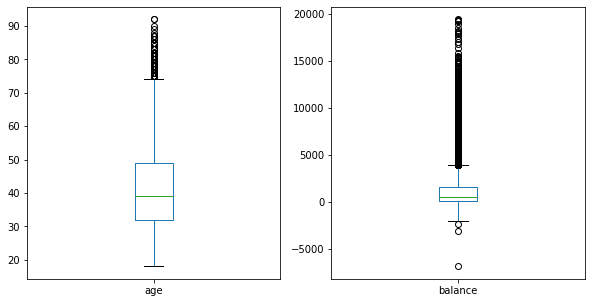

In [67]:
vars_num = ['age', 'balance']
df_train[vars_num].plot.box(subplots=True, figsize=[10,5])
plt.show()

In [68]:
df_train[vars_num].apply([np.mean, np.std])

,age,balance
mean,41.146913,1360.832470
std,11.856059,2233.509819


For both features, we will perform standardscaling. Import and instantiate standard scaler.

In [69]:
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()

In [70]:
df_train[vars_num] = scaler_std.fit_transform(df_train[vars_num])

In [71]:
df_train[vars_num].apply([np.mean, np.std])

,age,balance
mean,-2.647724e-16,4.140822e-17
std,1.000056e+00,1.000056e+00


Using the transform method, apply the scaling to the columns in the test data as well.

In [72]:
df_test[vars_num] = scaler_std.transform(df_test[vars_num])

In [73]:
df_test[vars_num].apply([np.mean, np.std])

,age,balance
mean,0.020056,0.040063
std,1.009914,1.053442


In [74]:
df_train.head()

,age,balance,contact,poutcome,deposit,job_encoded,marital_single,marital_married,month_enc,edu_enc,loan_any
3785,-0.096742,-0.144549,1,0,0.0,0.404601,1,0,0.457819,1,1
1748,1.168505,-0.817966,0,0,1.0,0.464187,0,1,0.332447,0,0
5314,-0.349791,-0.406035,1,0,0.0,0.359274,0,1,0.332447,1,0
10907,-0.940240,-0.507227,0,0,0.0,0.359274,1,0,0.568106,1,1
6796,1.337205,-0.467825,0,0,0.0,0.659539,0,0,0.403571,1,1


In [77]:
df_train.to_csv("Azra Marketing - Train.csv", index=False)

In [76]:
df_test.to_csv("Azra Marketing - Test.csv", index=False)